<a href="https://colab.research.google.com/github/nickstone1911/data-analysis-practice/blob/main/KNN_Classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tech Lesson 11: KNN Classifer Exercise

## Learning Objectives
In this exercise, you will learn how to:

1. Set up a `Pipeline` to organize data preprocessing
2. Conduct a `GridSearchCV` using the `Pipeline`
3. Understand how to use the KNN classifier to predict a class


---

# Data Description

## The Sonar Data: Detecting a Rock (R) or a Mine (M)

Sonar (sound navigation ranging) is a technique that uses sound propagation (usually underwater, as in submarine navigation) to navigate, communicate with or detect objects on or under the surface of the water, such as other vessels.

>- [sonar.jpg](https://drive.google.com/file/d/1Eu5rNQw4z6MSO1Uh3453NPToZeQsGwbv/view?usp=sharing)

The data set contains the response metrics for 60 separate sonar frequencies sent out against a known mine field (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine).

>- [mine.jpg](https://drive.google.com/file/d/1pfbys4wiBk8MWku0BFjbQdlCZl8aCvoL/view?usp=sharing)

Our main goal is to create a machine learning model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies.

## Data Source

>- [Data Source](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)
>- [sonar.all-data.csv](https://drive.google.com/file/d/1oqLjsGjeYVYeEd3JL1o8Yr-U2EGAVNtD/view?usp=sharing)


---

# Section 1: Setting up the Environment

## 1.1: Imports

In the next cell import the following modules:

>- `os`, `numpy`, `pandas`, `matplotlib.pyplot`, `seaborn`
>- Use the common aliases for each of these

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2: Set Your Working Directory

In the next cell, set your working directory to your desired workspace for this lesson.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
os.chdir('/content/drive/MyDrive/BAIM4205')
os.getcwd()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


'/content/drive/MyDrive/BAIM4205'

## 1.3: Load Data

The sonar data can be found in the following csv file. Download/move the file to your working directory.

>- [sonar.all-data.csv](https://drive.google.com/file/d/1oqLjsGjeYVYeEd3JL1o8Yr-U2EGAVNtD/view?usp=sharing)


In the next cell(s) check that the file is in your working directory then load it into a dataframe named, `sonar_df`

In [ ]:
sonar_df = pd.read_csv('sonar.all-data.csv')

## 1.4: Check Records

In the next cell, show the first 5 records of `gene_df`.

In [ ]:
sonar_df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## 1.5: Data Prep - Encode the `Label`

In order to see correlations between the label and features, we need to encode it. Create a new column, `label_encode` that converts the label to "0's" and "1's". Use the following mapping:
>- "M" --> 0
>- "R" --> 1

In [ ]:
sonar_df['label_encode'] =  sonar_df['Label'].map({'M': 0, 'R': 1})
sonar_df = sonar_df.drop('Label',axis=1)
sonar_df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,label_encode
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


# Section 2: Data Exploration

In this section we examine the data more closely.

## 2.1: Correlation Heat Map

In the next cell replicate the chart given in the image file below.

>- [Lesson11ex_2.1_scatter.png](https://drive.google.com/file/d/169kndVeX0FgDxijMiRqZATDg1OU3B_j-/view?usp=sharing)
>- This charts the correlations of each feature with the target

<Axes: >

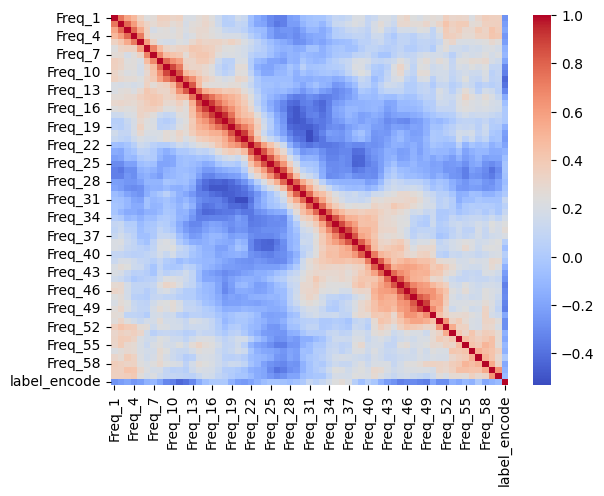

In [ ]:
sns.heatmap(round(sonar_df.corr(),2), cmap='coolwarm')

## 2.2: Descriptive Stats

In the next cell, show the descriptive stats for all the columns in `sonar_df`:

>- Round the results to two decimals

In [ ]:
round(sonar_df.describe(),2)

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,label_encode
count,208.00,208.00,208.00,208.00,208.00,208.00,208.00,208.00,208.00,208.00,...,208.00,208.00,208.00,208.00,208.00,208.00,208.00,208.00,208.00,208.00
mean,0.03,0.04,0.04,0.05,0.08,0.10,0.12,0.13,0.18,0.21,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.47
std,0.02,0.03,0.04,0.05,0.06,0.06,0.06,0.09,0.12,0.13,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.50
min,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.01,0.01,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.01,0.02,0.02,0.02,0.04,0.07,0.08,0.08,0.10,0.11,...,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.02,0.03,0.03,0.04,0.06,0.09,0.11,0.11,0.15,0.18,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00
75%,0.04,0.05,0.06,0.06,0.10,0.13,0.15,0.17,0.23,0.27,...,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,1.00
max,0.14,0.23,0.31,0.43,0.40,0.38,0.37,0.46,0.68,0.71,...,0.07,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,1.00


## 2.3: Class Distributions

In the next, cell show the class distributions.

>- Enter the distributions as percentages
>- Round to two decimals
>- Enter data in `0.XX` format

In [ ]:
round(sonar_df['label_encode'].value_counts(normalize=True),2)

label_encode
0    0.53
1    0.47
Name: proportion, dtype: float64

## 2.4: Missing Values

In the next code cell, check whether there are any missing values in `sonar_df`.

In [ ]:
sonar_df.isna().sum().sum()

0

## 2.5: Top 5 Correlated Features

### What are the top 5 correlated features with the target?

>- Show the **absolute** correlation values rounded to two deciamls

In [ ]:
round(np.absolute(sonar_df.corr()['label_encode']).sort_values(ascending=False).head(n=6),2)

label_encode    1.00
Freq_11         0.43
Freq_12         0.39
Freq_49         0.35
Freq_10         0.34
Freq_45         0.34
Name: label_encode, dtype: float64

# Section 3: Train/Test/Split

In this section we perform our standard train/test/split procedure and cross validation.

Recall the train/test/split procedure:

## In this section we will:
1. Import Libraries
2. Split Data in Train/Test for both X and y
>- Here we want to use 90% of our data for Cross Validation (`X_cv`, `y_cv`)
>- The remaining 10% will be used for validation (`X_test`, `y_test`)
3. Fit/Train Scaler on Training X Data
>- We will define a pipeline here to streamline our processing code
4. Scale X Test Data
>- Using a pipeline
5. Create Model
6. Fit/Train Model on X Train Data
7. Evaluate Model on X Test Data (by creating predictions and comparing to Y_test)
8. Adjust Parameters as Necessary and repeat steps 5 and 6



## 3.1: Imports

In the next cell, import the libraries for performing a train-test-split on the data, create a `Pipeline`, and be able to use a `KNeighborsClassifier`.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

## 3.2: Split Data into Training and Testing Sets



### 3.2.1: Define `X` and `y`

In the next cell, define your `X` and `y` data.

In [ ]:
X = sonar_df.drop('label_encode',axis=1)
X.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [ ]:
y = sonar_df['label_encode']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label_encode, dtype: int64

### 3.2.2: Split Data

In the next cell, split the data into training and testing sets based on:

1. Test size of .10
2. Random state of 42

>- Name the training datasets, `X_cv` and `y_cv` because we will perform cross validation using this data

In [ ]:
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size = .10, random_state = 42)

### 3.3: Creating a Pipeline for Data Preprocessing

In the next cell(s), define a `Pipeline` set of operations that will:

1. Scale the `X` datasets using `StandardScaler()`.
2. Includes a default `KNN` model

Instantiate the scaler and model objects.

In [ ]:
scaler = StandardScaler()
knn_model = KNeighborsClassifier()

Define the operations in the next cell:

In [ ]:
operations = [('scaler',scaler),('knn',knn_model)]

Now, set up your Pipline object:

In [ ]:
pipe = Pipeline(operations)

## 3.4: Peform a `GridSearchCV`

In the next cell(s), peform a grid search to find the optimal value of k for the KNN classifier model.

>- Search for k values from 1 to 29 (inclusive)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
k_values = list(range(1,30))

In [ ]:
param_grid = {'knn__n_neighbors': k_values}

In [ ]:
full_cv_classifier = GridSearchCV(pipe, param_grid,cv=5, scoring='accuracy')

Make sure to fit the grid search cv object to the cross validation datasets.

In [ ]:
full_cv_classifier.fit(X_cv,y_cv)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

## 3.5: GridSearchCV Results

In the next cell(s), show the best parameters as given from the grid search.

>- What value of `k` did the grid search indicate was best?

In [ ]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

## 3.6: Review GridSearchCV Results

In the next cell, use the provide chart to show the accuracy results provided from the grid search.

>- Replicate this chart: [lesson11ex_3.6_gridcv.png](https://drive.google.com/file/d/1--qaIBeFqzx7emvKAACwXbxF2-2TZcdP/view?usp=sharing)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 3.7: Evaluate the Grid Search Model

In the next cell(s), use the grid classifier object from the previous steps to show a confusion matrix and performance report.

In [ ]:
fullcv_pred = full_cv_classifier.predict(X_test)
print(classification_report(y_test,fullcv_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



In [ ]:
cf = confusion_matrix(y_test, fullcv_pred, normalize = 'true')

cf_df = pd.DataFrame(cf,
                     index = ['true_0(mine)', 'true_1(rock)'],
                     columns = ['pred_0(mine)', 'pred_1(rock)'])

round(cf_df, 3)

,pred_0(mine),pred_1(rock)
true_0(mine),0.923,0.077
true_1(rock),0.125,0.875


# Section 4: Final Model and Evaluation
In this section we build and evaluate our final model.

>- Use the value of k that the  GridSearch recommended.

>- Let's now use the PipeLine again, but this time, no need to do a grid search, instead set the model value of k to what the GridSearch recommended

## 4.1: Define Final Pipeline Operations

In the next cell, define the operations for a new pipeline based on:

1. scaler set to `StandardScaler()`
2. `knn1` which is a `KNeighborsClassifier` with k = 1
3. `operations` which is the list of tuples to define the steps in the pipeline

In [ ]:
scaler = StandardScaler()
knn1 = KNeighborsClassifier(n_neighbors=1)
operations = [('scaler',scaler),('knn1',knn1)]

## 4.2: Define Pipeline Object

In the next cell, define `pipe` which is the new pipeline based on the operations defined in 4.1.

In [ ]:
pipe = Pipeline(operations)

## 4.3: Fit `pipe` to the Training Data

In the next cell, fit the new pipeline to the training data.

In [ ]:
pipe.fit(X_cv,y_cv)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn1', KNeighborsClassifier(n_neighbors=1))])

## 4.4: Predict with `pipe`

In the next cell, use `pipe` to predict values. Name the predictions `pipe_pred`.

In [ ]:
pipe_pred = pipe.predict(X_test)

## 4.5: Evaluate `pipe`

In the next cell, show the classification report for the `pipe` model.

>- Compare these results to the prior classification report in section `3.5.5`

In [ ]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



## 4.6: Confusion Matrix

In the next cell, show the confusion matrix for `knn_model`.

>- Pass in the appropriate parameters and argument so this confusion matrix will show the rates: TP, TN, FP, FN rates in the matrix.
>>- See [confusion_matrix doc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn-metrics-confusion-matrix) for help on what parameter and argument to pass to get these rates.

>- Convert the confusion matrix to a dataframe
>- Round the rates to three decimals
>- When entering data enter in the format: `0.XXX`

In [ ]:
cf = confusion_matrix(y_test, pipe_pred, normalize = 'true')

cf_df = pd.DataFrame(cf,
                     index = ['true_0(mine)', 'true_1(rock)'],
                     columns = ['pred_0(mine)', 'pred_1(rock)'])

round(cf_df, 3)

,pred_0(mine),pred_1(rock)
true_0(mine),0.923,0.077
true_1(rock),0.125,0.875


# Section 5: Final Evaluation

Based on your analysis, would you recommend the model for deployment? Explain your reasoning.

### Notes

Enter your notes in this markdown